# TED TALKS VIEWS PREDICITION



*   TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

*   Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.


*   TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of **Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates**.







## **The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

In [ ]:
# from google.colab import drive
# drive._mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Importing necessary libraries
import time
import matplotlib.pyplot as plt
import matplotlib
import ast
import pandas as pd
import seaborn as sns
import warnings
import itertools
import plotly.express as px
import numpy as np
from datetime import datetime
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import calendar
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TedTalk/ted_talks_en.csv")

## Prelim analysis

In [ ]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [ ]:
print("% of null values in columns\n")
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

% of null values in columns



comments          16.354557
occupations       13.033708
about_speakers    12.559301
all_speakers       0.099875
recorded_date      0.024969
talk_id            0.000000
description        0.000000
url                0.000000
related_talks      0.000000
topics             0.000000
duration           0.000000
event              0.000000
available_lang     0.000000
native_lang        0.000000
title              0.000000
published_date     0.000000
views              0.000000
speaker_1          0.000000
transcript         0.000000
dtype: float64

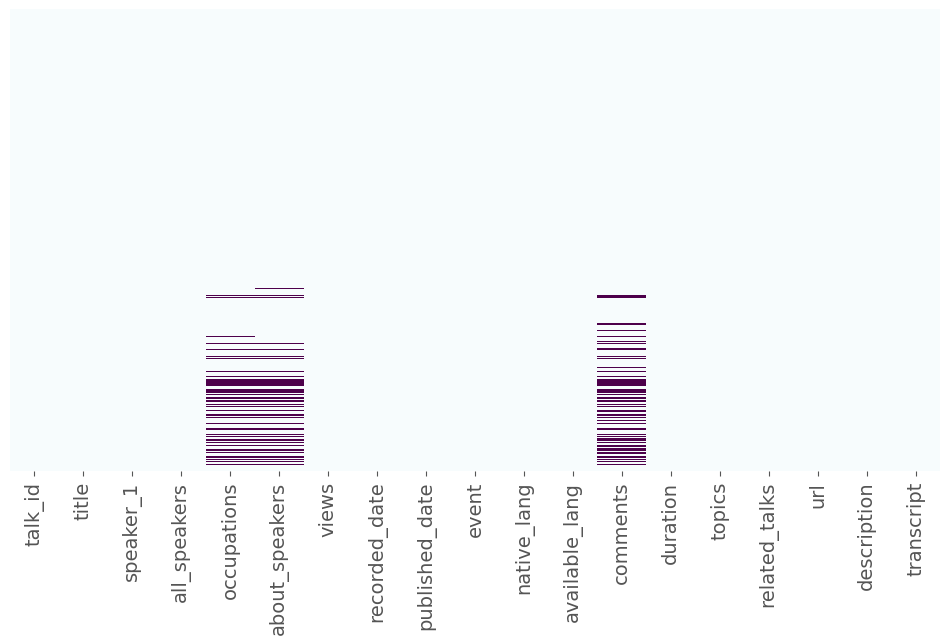

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='BuPu');

In [ ]:
df.duplicated().value_counts()

False    4005
dtype: int64

In [ ]:
df['talk_id'].nunique() == len(df)

True

#***EDA***

## No duplicates but few null values that need to be treated

In [ ]:
#Dropping reduntant columns
df.drop(['talk_id','url'],axis=1,inplace=True)

In [ ]:
numerical, categorical = [], []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

print('Numerical columns are: ', numerical,'\n')
print('Categorical columns are: ', categorical)

Numerical columns are:  ['talk_id', 'views', 'comments', 'duration'] 

Categorical columns are:  ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


# Univariate analysis

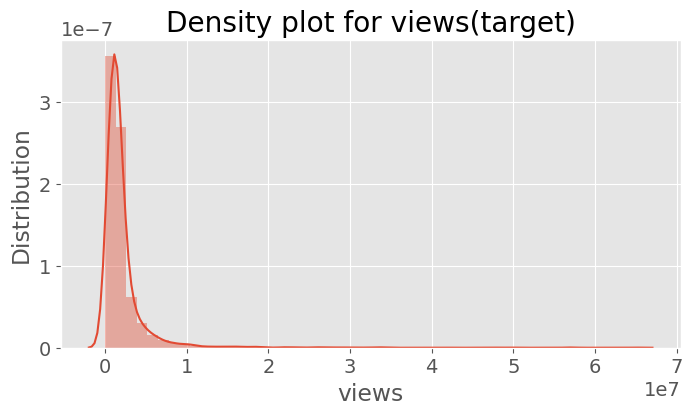

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['views'])
plt.title("Density plot for views(target)")
plt.ylabel("Distribution");

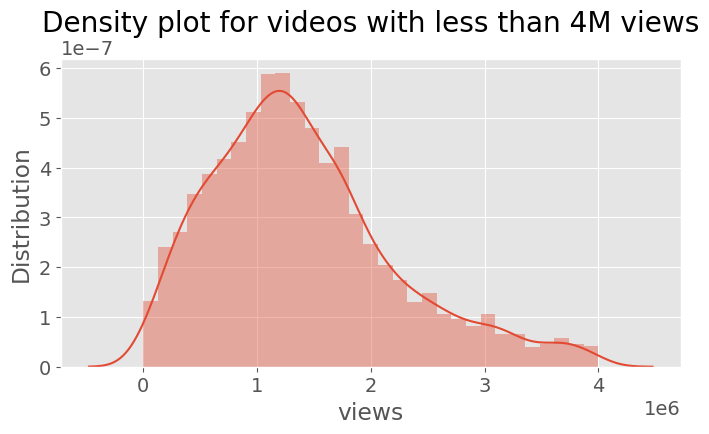

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df[df['views'] < 4e6]['views'])
plt.title("Density plot for videos with less than 4M views")
plt.ylabel("Distribution");

## Most of the Ted talk videos have less than 4 million views.

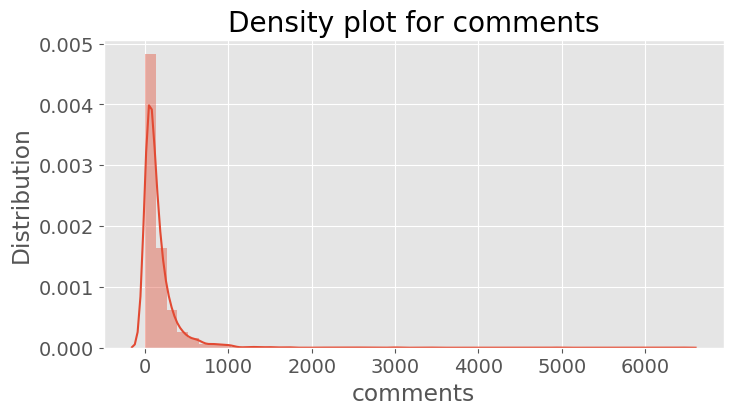

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['comments'])
plt.title("Density plot for comments")
plt.ylabel("Distribution");

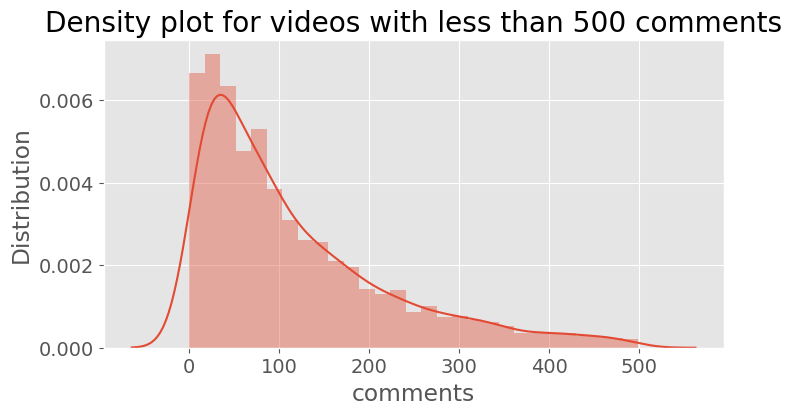

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df[df['comments'] < 500]['comments'])
plt.title("Density plot for videos with less than 500 comments")
plt.ylabel("Distribution");

## Maximum videos have less than 500 comments

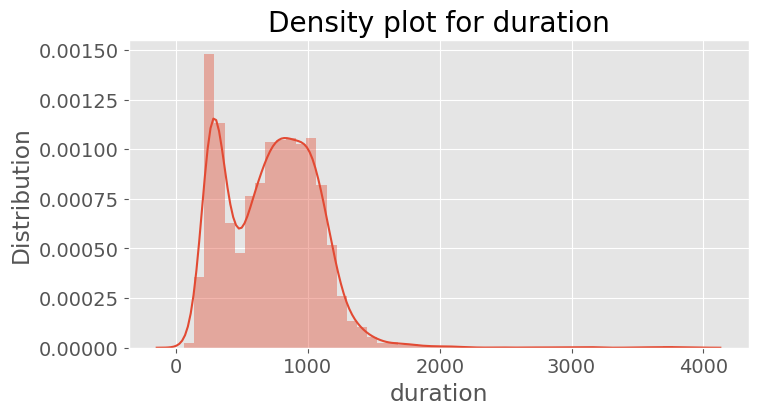

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['duration'])
plt.title("Density plot for duration")
plt.ylabel("Distribution");

In [ ]:
#@title Most frequent Events
series_with_events = df['event'].value_counts()[:10]
fig = px.pie(names=series_with_events.index,values=series_with_events.values,
             labels={"names":"Event names ","values":"Number of talks "},
             title="Top 10 events with highest count",
             color_discrete_sequence=px.colors.sequential.Bluyl
             )
fig.update_layout(title_font_color="#fff",paper_bgcolor="#000000",
                  title_font_size=20,title_x=.5,font_color="#bbb",
                  plot_bgcolor="#D0D3D4",legend=dict(bgcolor="grey",font=dict(size=17,color='#fff')))

fig.show(renderer='colab')

#Encoding of Categorical Features

In [ ]:
# Checking value counts in categorical features
from termcolor import colored
for column_name in df.describe(include=['object','category']).columns:
  print(colored(f"Value counts for {column_name}:", attrs=['bold']))
  print(df[column_name].value_counts())

Value counts for title:
Averting the climate crisis                                    1
Be humble -- and other lessons from the philosophy of water    1
The virginity fraud                                            1
Why I train grandmothers to treat depression                   1
Fashion that celebrates African strength and spirit            1
                                                              ..
Forget multitasking, try monotasking                           1
Why global jihad is losing                                     1
A bath without water                                           1
Lessons in business ... from prison                            1
The most important anus in the ocean                           1
Name: title, Length: 4005, dtype: int64
Value counts for speaker_1:
Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Peter van Manen      1
 Beardyman           1
Daniel H.

In [ ]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

<Axes: xlabel='speaker_1'>

<Figure size 1000x2000 with 0 Axes>

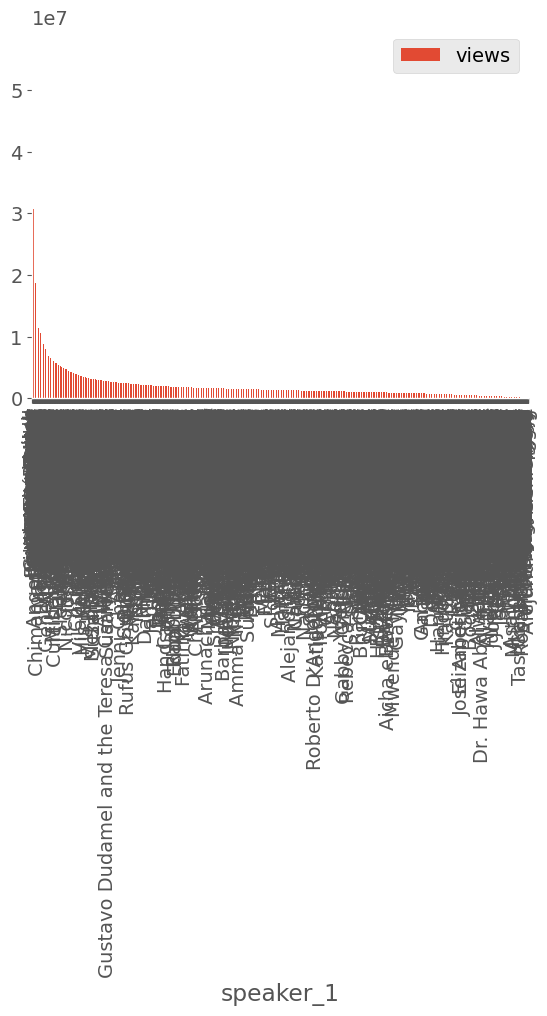

In [ ]:
plt.figure(figsize=(10,20))
speaker_df=pd.DataFrame(df.groupby('speaker_1')['views'].mean().sort_values(ascending=False))
speaker_df.plot.bar()

In [ ]:
# In the above bar plot, we can find there is a strong relationship of speaker with views.
# Thus we can divide speakers into three categories: Highly Famous:2, Medium Famous:1, Least Famous:0
speaker_df.rename(columns={'views':'views_mean'},inplace=True)
df = df.merge(speaker_df,on = 'speaker_1',how = 'left')
df['speaker_cat'] = df['views_mean'].apply(lambda x : 0 if x < 0.4*10**7 else (1 if 0.4*10**7 <= x < 0.8*10**7 else 2))



In [ ]:
df["speaker_cat"].value_counts()

0    3611
1     278
2     116
Name: speaker_cat, dtype: int64

#Feature Engineering on topics column

In [ ]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

###The topics column basically contains the list of topic tags associated with each video.

In [ ]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

###Let's add a new feature which contain the count of total no of topics for a particular video.

In [ ]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

<Axes: xlabel='num_of_tags', ylabel='Density'>

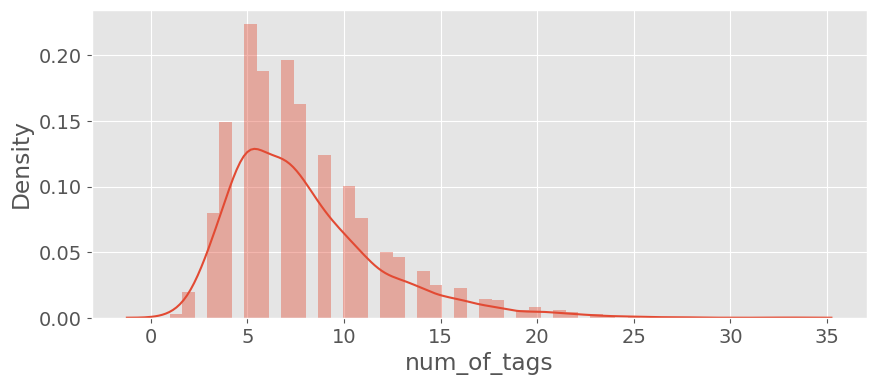

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

###Now, let's do target encoding on topics column.

In [ ]:
df['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [ ]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]

  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

<Axes: xlabel='topics_wise_avg_views', ylabel='Density'>

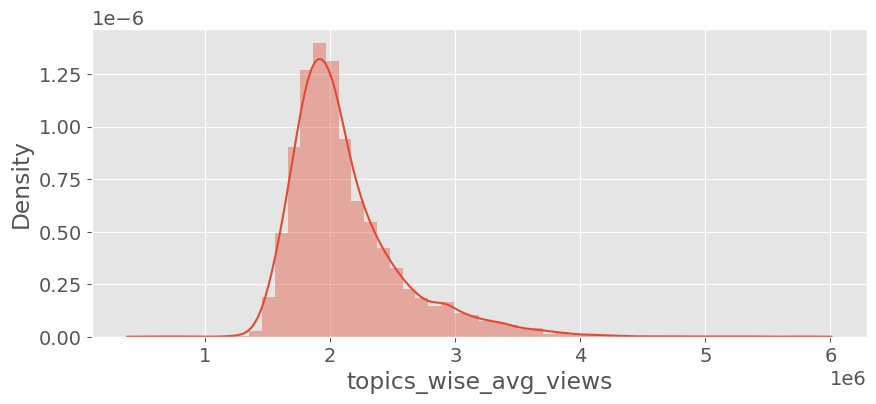

In [ ]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

### TED-Ed events have the most videos followed by yearly events

## Checking occupations of speakers

In [ ]:
# Filling missing values with Other
df['occupations'].fillna(str({0:'Other'}),axis=0,inplace=True)

In [ ]:
# Filling all speakers column nan values with speaker_1
for i,r in enumerate(df.to_dict('records')):
  if pd.isnull(r['all_speakers']):
    dct = {0:r['speaker_1']}
    df['all_speakers'][i] = str(dct)

In [ ]:
cols_to_eval = ['all_speakers','occupations','available_lang','topics','related_talks']
for i in cols_to_eval:
  df[i] = df.apply(lambda row: eval(row[i]), axis=1)

In [ ]:
df['speaker_occupation'] = df.apply(lambda row : row['occupations'][0][0],axis=1)
df.drop(['occupations'],axis=1,inplace=True)

In [ ]:
top_occ = df['speaker_occupation'].value_counts()[1:].head(10).reset_index()

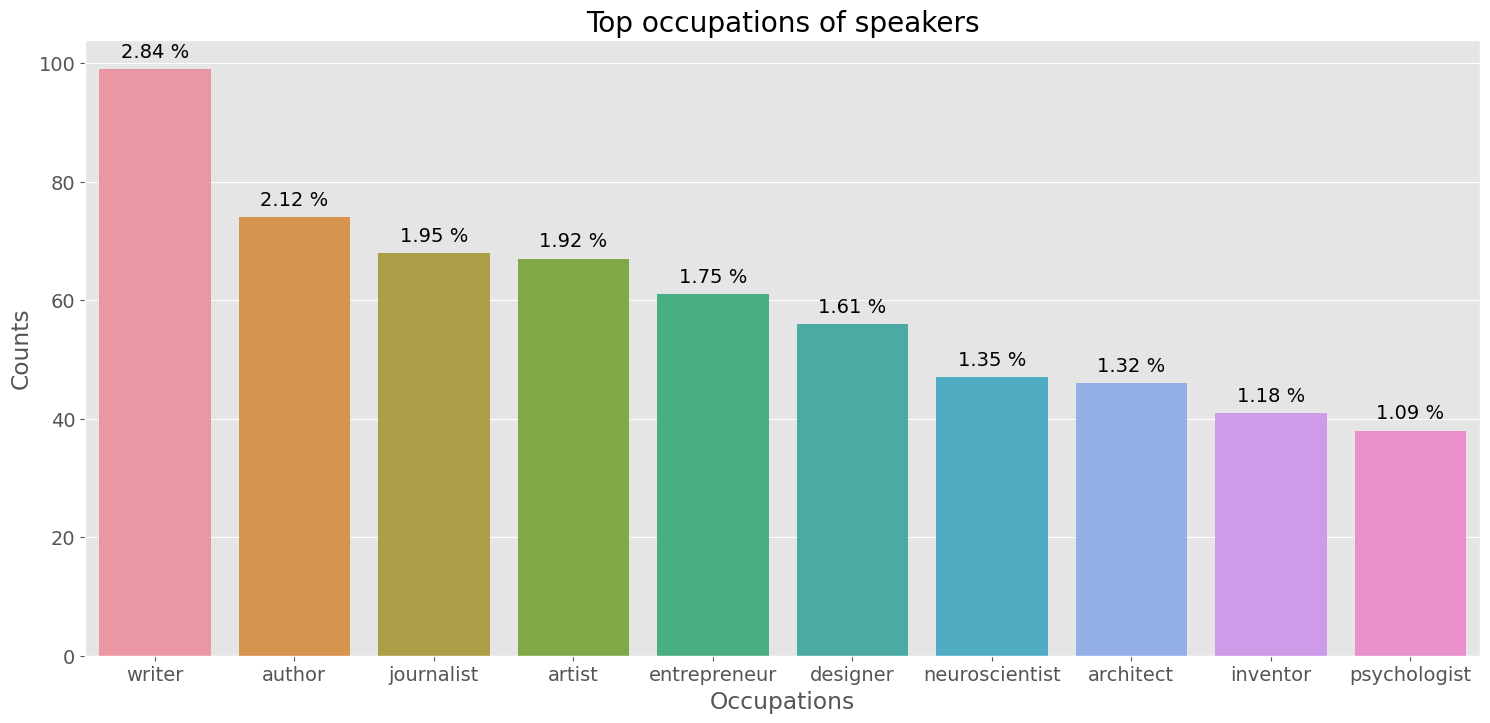

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Top occupations of speakers')
ax = sns.barplot(x='index',y='speaker_occupation',data=top_occ)
plt.xlabel("Occupations")
plt.ylabel('Counts')
for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.2f} %'.format(height *100 / len(df[df['speaker_occupation'] != 'O'])), ha="center")

### Writers are the most frequent speakers of the talks followed by artists and journalists

## Time series analysis

In [ ]:
def str_to_date(x):
  try:
    return datetime.strptime(x,"%Y-%m-%d")
  except TypeError:
    pass
df['published_date'] = df['published_date'].apply(str_to_date)

In [ ]:
df['published_year'] = df.apply(lambda row : row['published_date'].year,axis=1)
df['weekday'] = df['published_date'].apply(lambda x : x.day_name())
df['published_month'] = df.apply(lambda row : row['published_date'].month_name(),axis=1)
df['video_age'] = 2020 - df['published_year'] + 1

In [ ]:
pub_df = df['published_year'].value_counts().reset_index().sort_values('index')

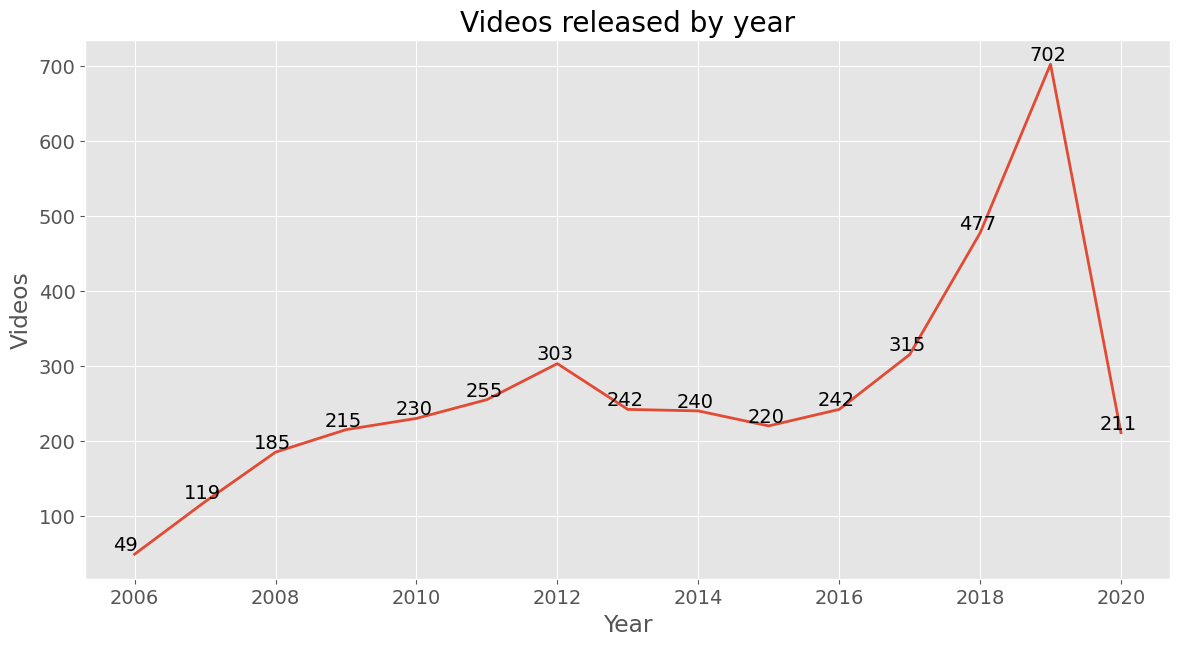

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=pub_df, x="index", y="published_year",lw=2)
plt.xlabel('Year')
plt.ylabel('Videos')
plt.title('Videos released by year')
plt.grid(True)

for i,j in zip(pub_df['index'],pub_df["published_year"]):
  ax.annotate(str(j),xy=(i-.30,j+5))

### 2019 had the most video uploads with a drastic decrease in 2020 because of **COVID - 19**

In [ ]:
weekly_df = pd.crosstab(df['published_year'],df['weekday']).reset_index()

In [ ]:
weekdays = ['Friday',	'Monday',	'Saturday',	'Sunday',	'Thursday',	'Tuesday',	'Wednesday']

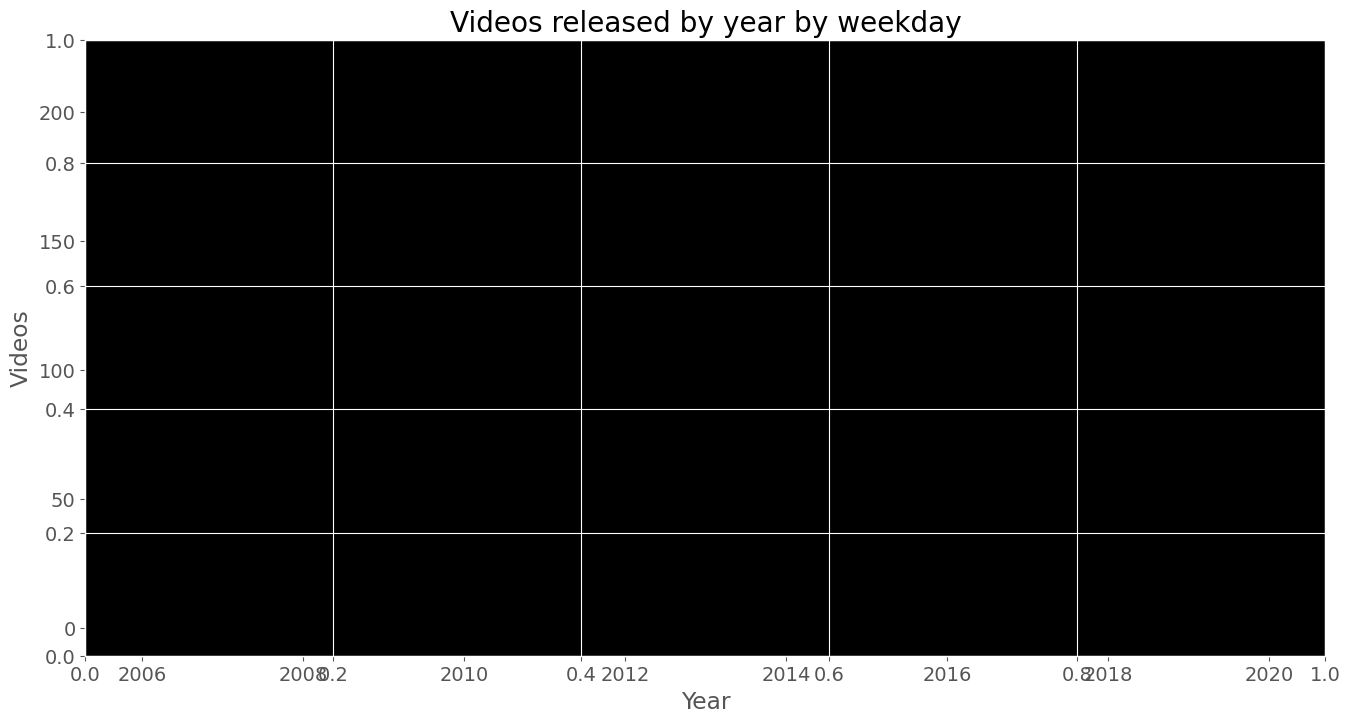

In [ ]:
#@title Releases by weekday
plt.figure(figsize=(16,8))
for i in weekdays:
  sns.lineplot(data=weekly_df, x="published_year", y=i,lw=4)
plt.xlabel("Year")
plt.ylabel("Videos")
plt.title("Videos released by year by weekday")
plt.legend(weekdays)
ax = plt.axes()
ax.set_facecolor("black")
plt.grid(True);

### Most videos have been uploaded on Friday over the years

In [ ]:
month_df = df.groupby(['published_month'])['title'].count().reset_index().sort_values('title',ascending=False)

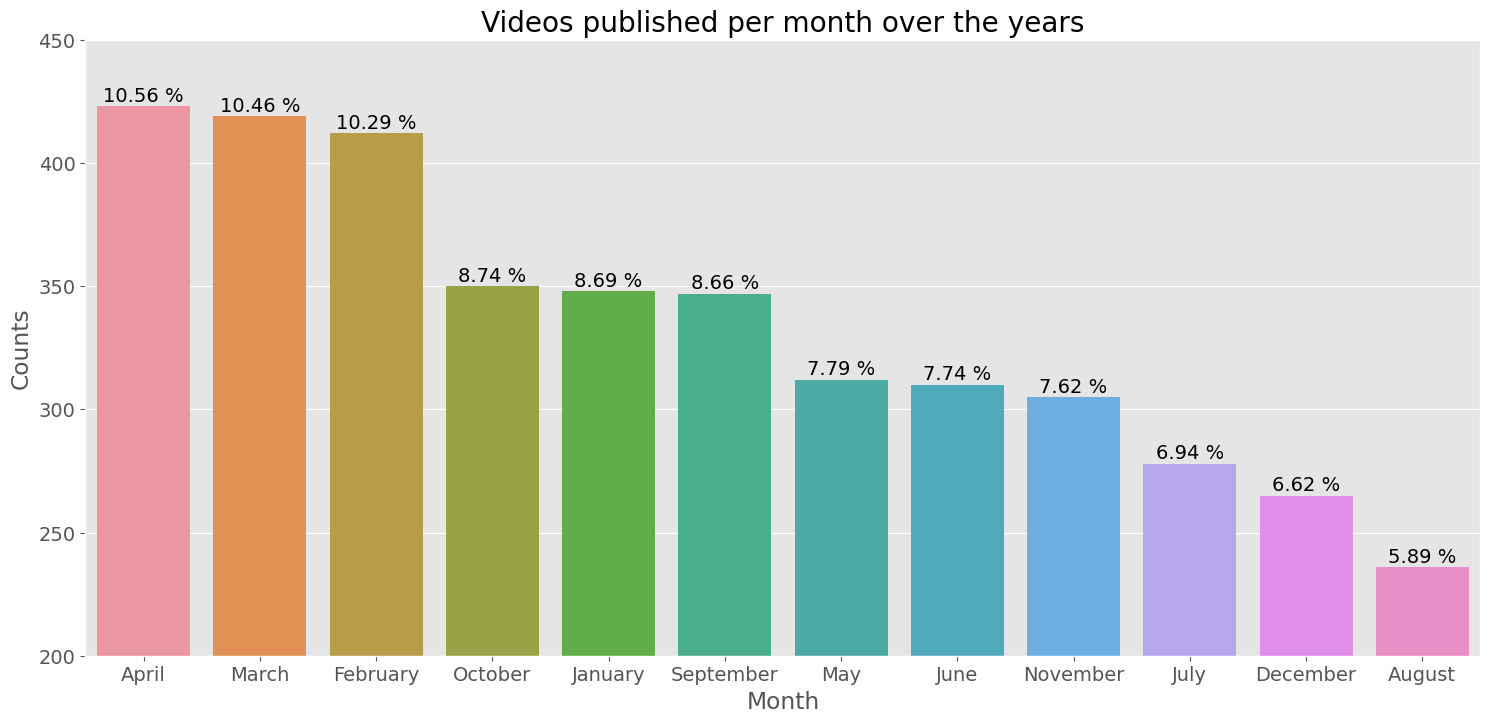

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Videos published per month over the years')
ax = sns.barplot(x='published_month',y='title',data=month_df)
plt.xlabel("Month")
plt.ylabel('Counts')
plt.ylim(200,450)
for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.2f} %'.format(height *100 / len(df)), ha="center")

### The first quarter of the year sees most video uploads

In [ ]:
spk_df = df['speaker_1'].value_counts().reset_index().head(10)

In [ ]:
fig = px.bar(spk_df,x='index',y="speaker_1",
             title="Most frequent speakers",
             color_discrete_sequence=["#154360"],
             text=list(spk_df['speaker_1']),labels={"index": "Speaker Name",
             "speaker_1": "Count"})
fig.show()

### Alex Gendler is the most frequent speaker as he acts as a host and narrator in many videos

In [ ]:
df['total_lang'] = df.apply(lambda row : len(row['available_lang']),axis=1)
df['total_topics'] = df.apply(lambda row : len(row['topics']),axis=1)

In [ ]:
num_cols = [col for col in list(df.columns) if df[col].dtype in ['int64','float64'] and col != 'published_year']

### Box plot for checking outliers in numerical columns

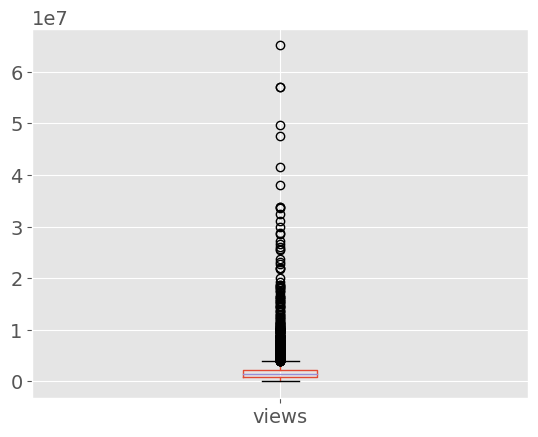

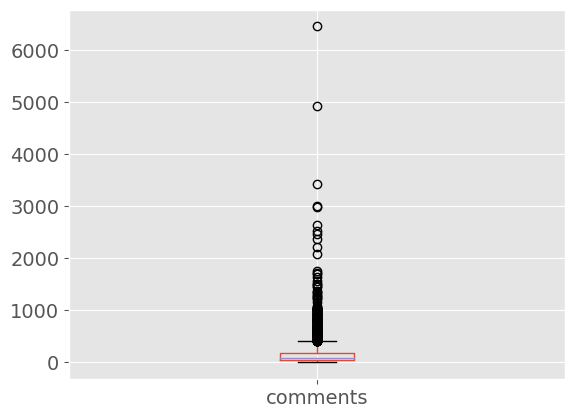

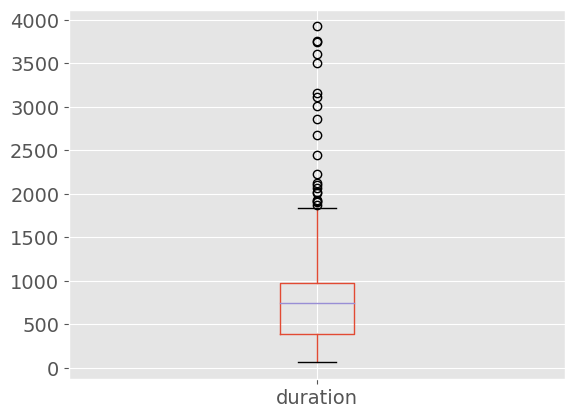

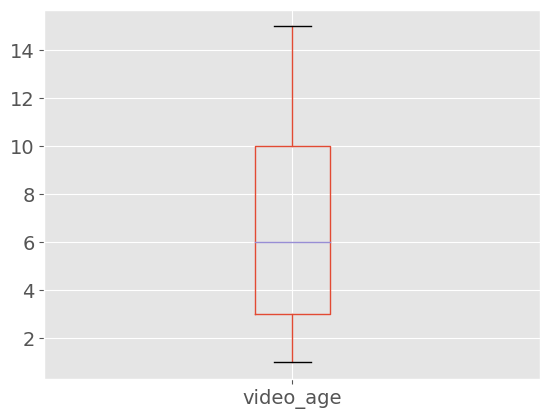

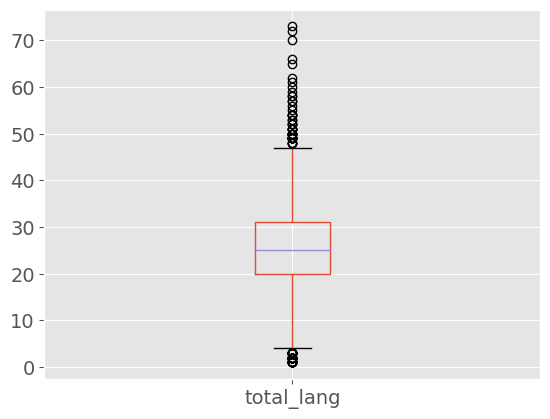

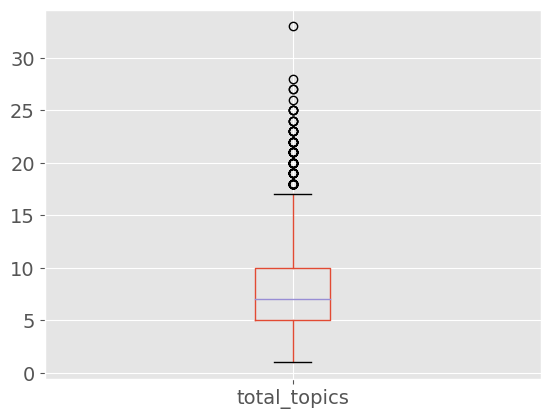

In [ ]:
for i in df[num_cols]:
    plt.figure()
    df.boxplot([i],grid=True,figsize=(6,6))

### Almost all columns have outliers

In [ ]:
df['num_related_talks'] = df.apply(lambda row : len(row['related_talks']),axis=1)

In [ ]:
#@title Languages
lang_dict = {}
for i in df.to_dict('records'):
  tmp = i['available_lang']
  for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).reset_index().sort_values("count",ascending=False).head(15)

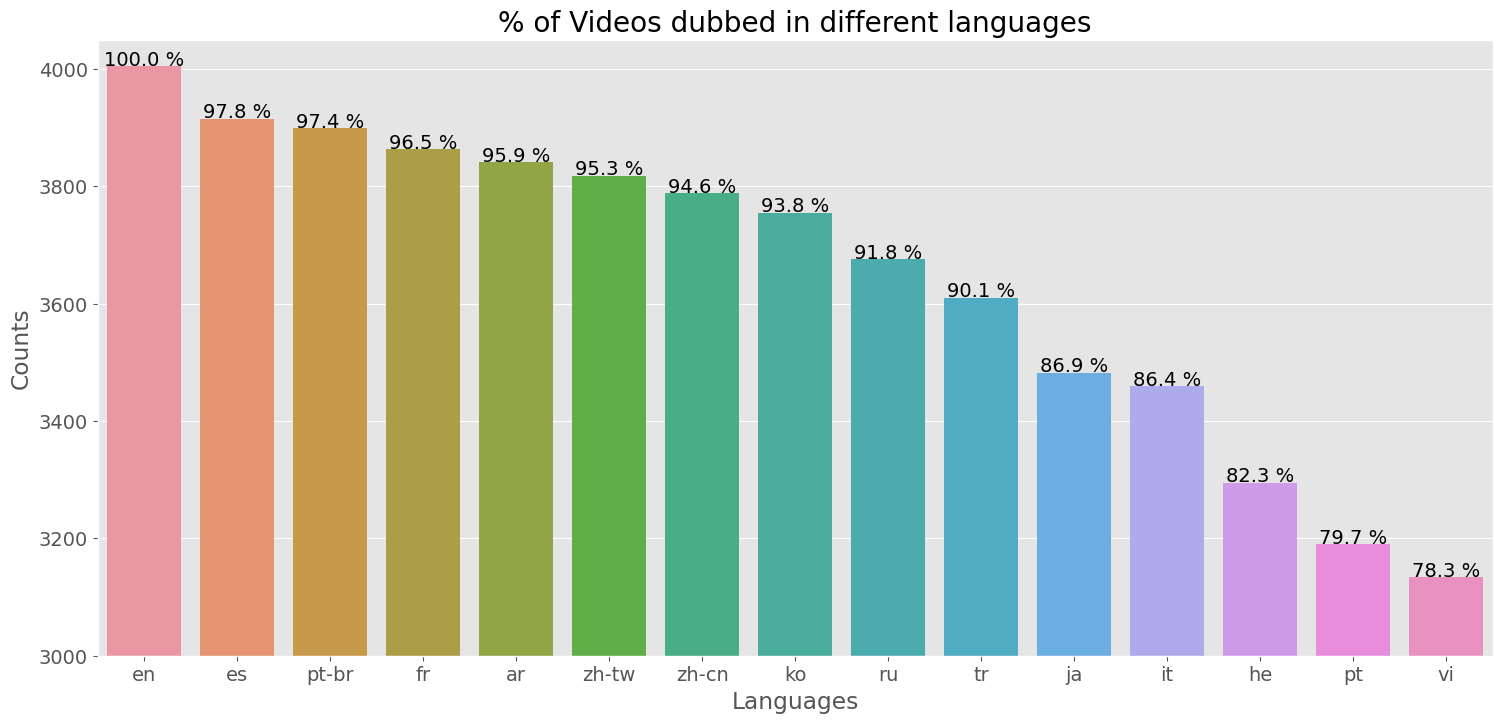

In [ ]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')
plt.ylim(3000,4050)
for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.1f} %'.format(height / len(df)*100), ha="center")

### All videos are available in English(en) followed by Spanish - español(es)

In [ ]:
topics_df = pd.DataFrame(df['topics'].explode().value_counts()).reset_index().head(12).drop([3,5],axis=0)

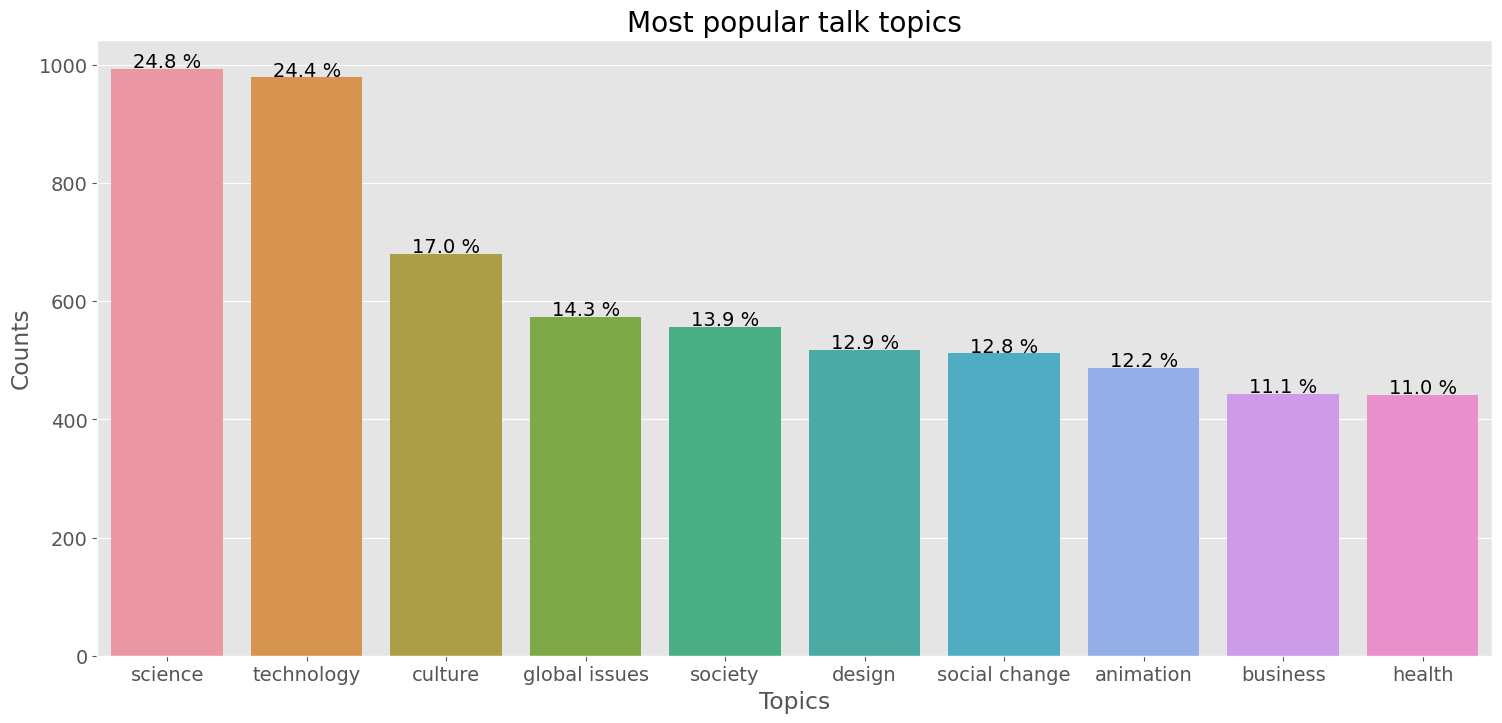

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Most popular talk topics')
ax = sns.barplot(x='index',y='topics',data=topics_df)
plt.xlabel("Topics")
plt.ylabel('Counts')
for i,p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.1f} %'.format(height *100 / len(df)), ha="center")

### Almost 50% of total videos are tagged under **'science and technology'**

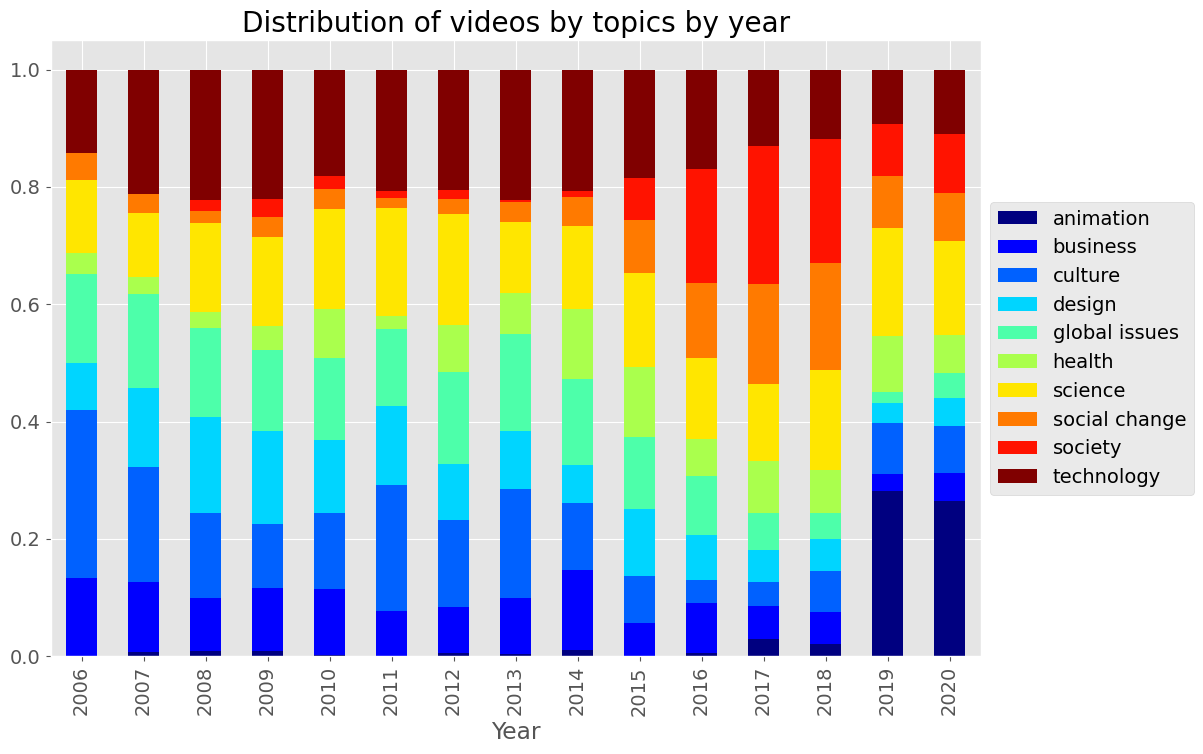

In [ ]:
#@title Stacked bar chart
s = df.apply(lambda x: pd.Series(x['topics']),axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'theme'
themes = df.drop('topics', axis = 1).join(s)
themes['published_year'] = themes['published_year'].astype('int')
s1 = themes[themes['theme'].isin(topics_df['index'].head(10))]
temp = pd.crosstab(s1['published_year'], s1['theme']).apply(lambda x: x/x.sum(), axis = 1)
temp.plot.bar(stacked = True, colormap = 'jet', figsize = (12, 8)).legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.title("Distribution of videos by topics by year");

### Proportion of topics scattered over the years

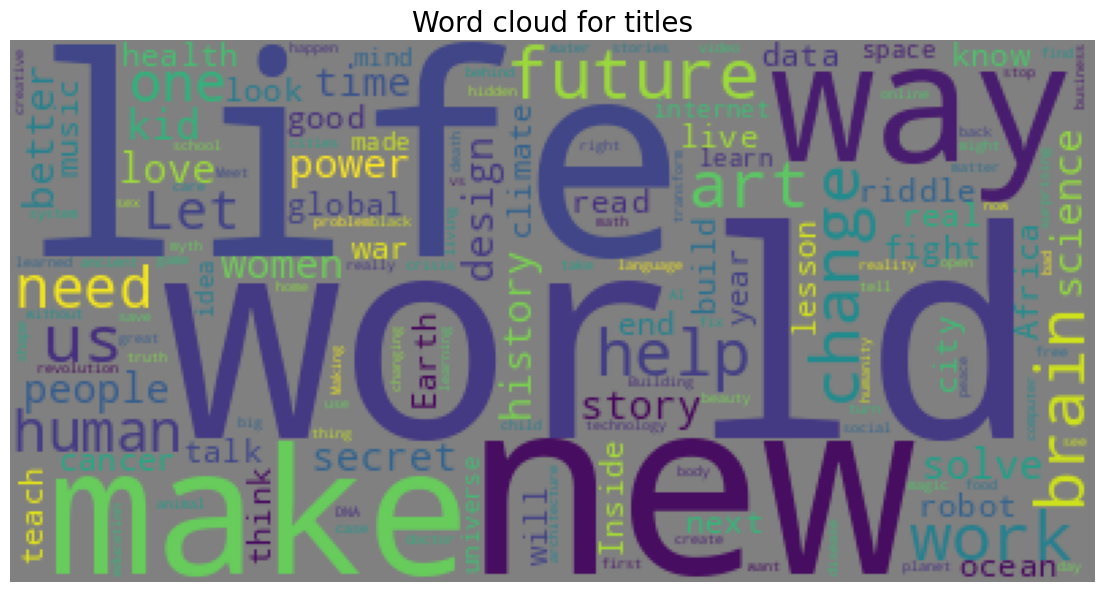

In [ ]:
plt.figure(figsize = (14,8))
wc = WordCloud(max_words = 500 ,background_color = 'grey',collocations=False).generate(" ".join(df['title']))
plt.grid("off")
plt.axis("off")
plt.title("Word cloud for titles")
plt.imshow(wc);

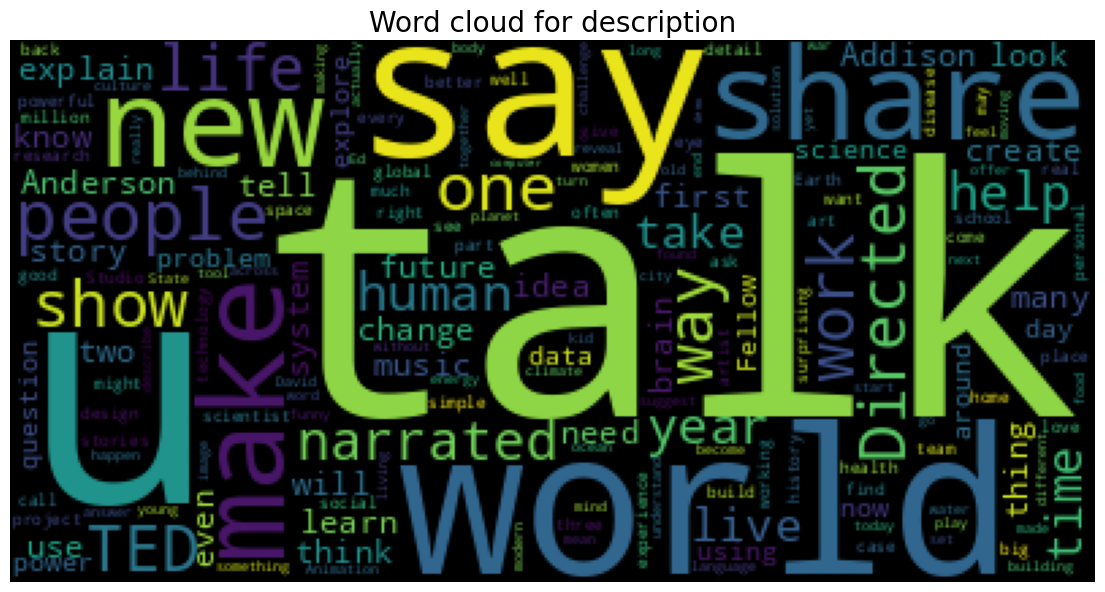

In [ ]:
plt.figure(figsize = (14,8))
wc = WordCloud(max_words = 500 ,background_color = 'black',collocations=False).generate(" ".join(df['description']))
plt.grid("off")
plt.axis("off")
plt.title("Word cloud for description")
plt.imshow(wc);

# Bivariate analysis

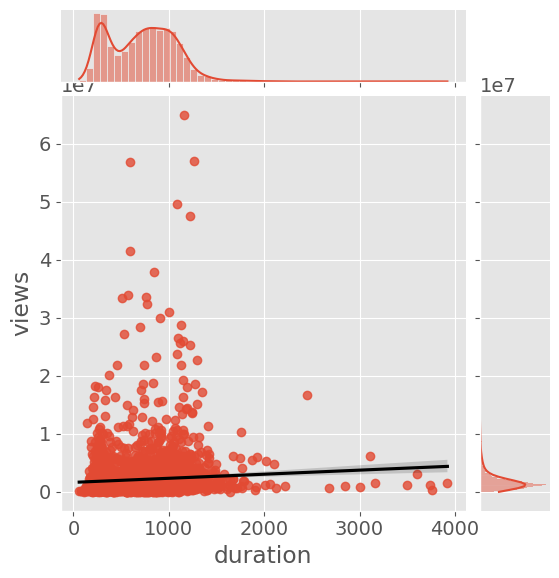

In [ ]:
sns.jointplot(data=df,x='duration', y='views', kind='reg',joint_kws={'line_kws':{'color':'black'}});

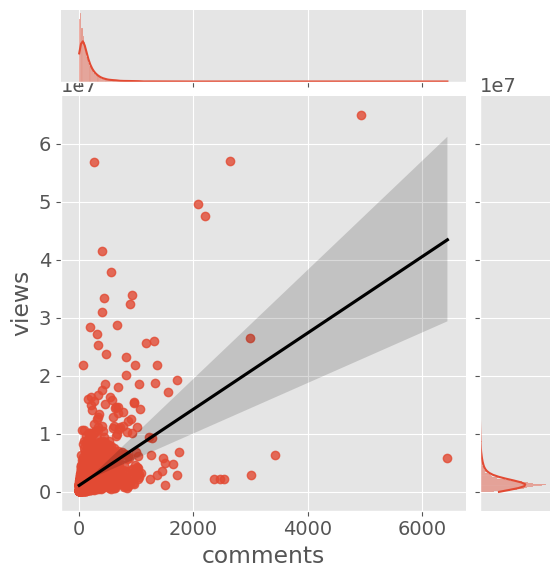

In [ ]:
sns.jointplot(data=df,x='comments', y='views', kind='reg',joint_kws={'line_kws':{'color':'black'}});

### Comments has a somewhat linear relationship with views

In [ ]:
mean_year_df = df.groupby(['published_year'])['views'].mean().reset_index()

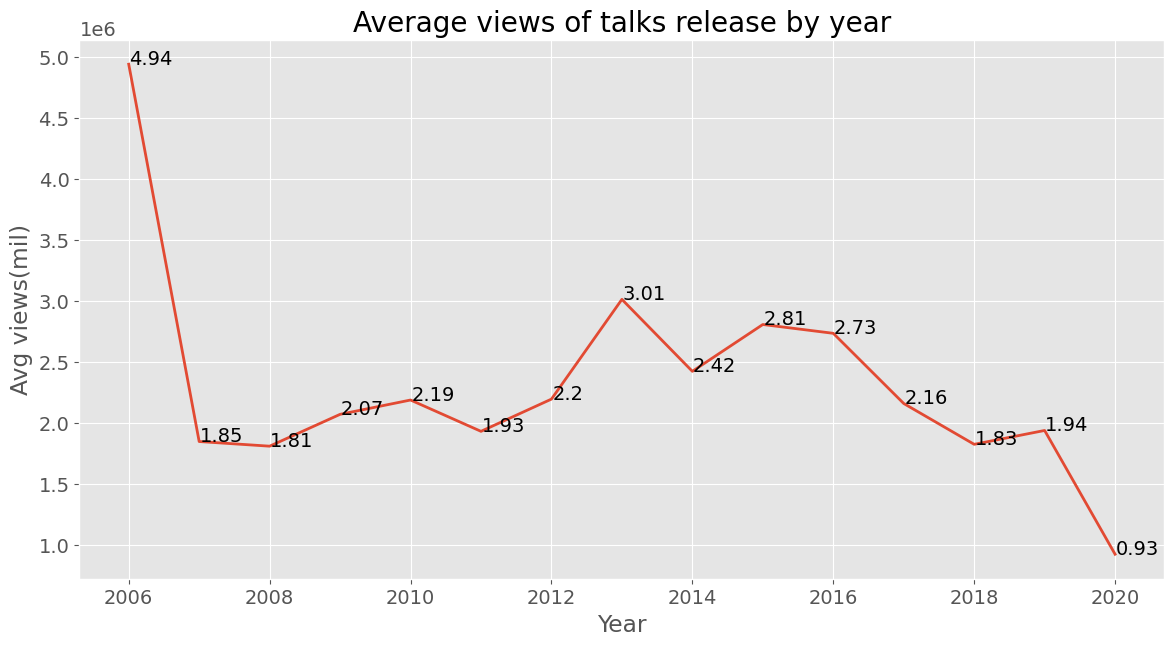

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=mean_year_df, x="published_year", y="views",lw=2)
plt.xlabel('Year')
plt.ylabel('Avg views(mil)')
plt.title('Average views of talks release by year')
plt.grid(True)

for i,j in zip(mean_year_df['published_year'],mean_year_df["views"]):
  ax.annotate(str(round(j/1e6,2)),xy=(i+0.01,j))

### When the videos first came out then it had the maximum average views, then a dip was observed in the following years followed by slight increase then again steady dip

In [ ]:
spk_views_df = df.groupby(['speaker_1'])['views'].mean().reset_index().sort_values('views',ascending=False).head(10)

In [ ]:
fig = px.bar(spk_views_df,x='speaker_1',y="views",
             title="Speakers with highest average views",
             color_discrete_sequence=["darkslateblue"],
             text=list(round(spk_views_df['views']/1e6,2)),labels={"speaker_1": "Speaker Name",
             "views": "Avg views"})
fig.show()

### Speakers having the maximum average views on their talks

# Multivariate analysis

In [ ]:
top_20 = df.sort_values('views',ascending=False)
top_20.dropna(inplace=True)
top_20 = top_20.head(20)

In [ ]:
data = [{
         'y': top_20.views,
         'x': top_20.index,
         'mode': 'markers',
         'marker': {'color': top_20.duration,'showscale': True,
                    'size': (top_20.comments)/100,},
         "text" :  top_20.speaker_1,
         }]
iplot(data)

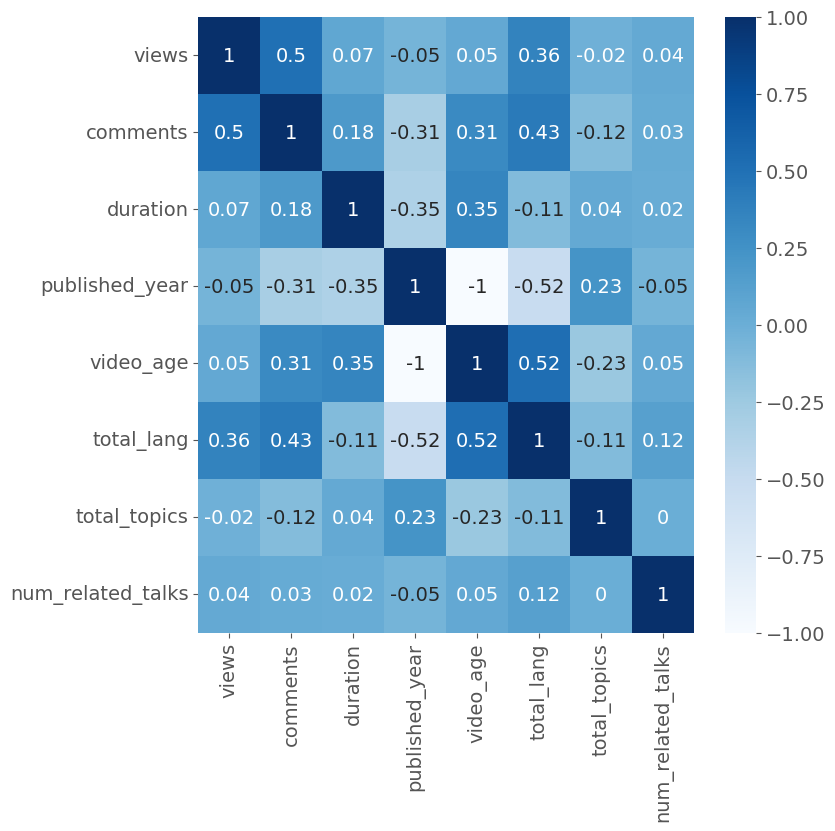

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues');

No two features are highly correlated that they can produce erroneous results

## After data preprocessing and feature engineering, we prepared our data for modelling. It is in the file labelled

# **Team_Notebook-Data Preparation, Base Model With Interpretation**
